### **`1. Import libraries and Dataset `**

In [28]:
from src.logger import logging

In [29]:
logging.info('PROJECT FILE 2 STARTS RUNNING!')

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [8]:
logging.info('LIBRARIES IMPORTED')

NameError: name 'logging' is not defined

In [9]:
df = pd.read_csv('D:/CCDP/notebook/Credit_Card_2.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [33]:
logging.info('DATA IMPORTED AND EXTRACTED TO DATAFRAME!')

## **`2. Feature Engineering`**

In [34]:
logging.info('FEATURE ENGINEERING STARTS!')

In [10]:
df = df.drop('ID', axis=1)

### **`2.1 Handling the imbalance of data using SMOTE`**

In [11]:
logging.info('HANDLING IMBALANCED DATA STARTS!')

NameError: name 'logging' is not defined

In [12]:
# Initialise SMOTE object
smote = SMOTE()

In [14]:
# Separate independent and dependent variables
X = df.iloc[:,:-1]
y = df['default']

In [15]:
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

In [16]:
# Combine balanced X and y
df_final = pd.DataFrame(x_smote, columns=df.columns[:-1])
df_final['default'] = y_smote

df_final.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [17]:
print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


<Axes: xlabel='default', ylabel='count'>

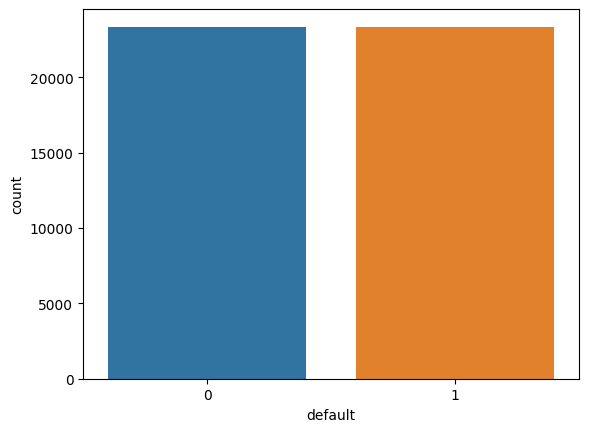

In [18]:
#plot to check if the dataframe is balanced after smote
sns.countplot(x='default', data=df_final)

In [19]:
df_final.default.value_counts()

default
1    23364
0    23364
Name: count, dtype: int64

In [ ]:
logging.info(HANDLING IMBALANCED DATA ENDS!)

Next, we need to perform One Hot Encoding on the categorical variables. But before that, we need to work on the following points:

* Change column names PAY_1 to PAY_6 as PAY_SEPT, PAY_AUG, PAY_JULY, PAY_JUNE, PAY_MAY AND PAY_SEPT.
* Change column names PAY_AMT1 to PAY_AMT6 to PAY_AMT_SEPT, PAY_AMT_AUG, PAY_AMT_JULY, PAY_AMT_JUNE, PAY_AMT_MAY AND PAY_AMT_SEPT.
* Change column names BILL_AMT1 to BILL_AMT6 to BILL_AMT_SEPT, BILL_AMT_AUG, BILL_AMT_JULY, BILL_AMT_JUNE, BILL_AMT_MAY AND BILL_AMT_SEPT.
* Change values in SEX:
    1-Male and
    2-Female
* Change values in EDUCATION :
    1 : Graguation
    2 : University
    3 : High School
    0,4,5,6 : Others
* Change values in Marriage:
    1 : Married
    2 : Single
    0,3 : Others

In [20]:
# Replace values in SEX, MARRIAGE and EDUCATION variables
df_final['SEX'] = df_final['SEX'].replace({1:'Male', 2:'Female'})
df_final['EDUCATION'] = df_final['EDUCATION'].replace({1:'Graduation', 2:'University', 3:'High_School', 0:'Others', 4:'Others', 5:'Others', 6:'Others'})
df_final['MARRIAGE'] = df_final['MARRIAGE'].replace({1:'Married', 2:'Single', 0:'Others', 3:'Others'})
df_final.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,Female,University,Married,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,Female,University,Single,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,Female,University,Single,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,Female,University,Married,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,Male,University,Married,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [21]:
# Change column names PAY_1 to PAY_6
df_final.rename(columns={'PAY_1':'PAY_SEPT', 'PAY_2':'PAY_AUG', 'PAY_3':'PAY_JULY', 
                    'PAY_4':'PAY_JUNE', 'PAY_5':'PAY_MAY', 'PAY_6':'PAY_APRIL'}, inplace=True)

# Change column names PAY_AMT_1 to PAY_AMT_6
df_final.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT', 'PAY_AMT2':'PAY_AMT_AUG', 'PAY_AMT3':'PAY_AMT_JULY', 
                    'PAY_AMT4':'PAY_AMT_JUNE', 'PAY_AMT5':'PAY_AMT_MAY', 'PAY_AMT6':'PAY_AMT_APRIL'}, inplace=True)

# Change column names BILL_AMT_1 to BILL_AMT_6
df_final.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT', 'BILL_AMT2':'BILL_AMT_AUG', 'BILL_AMT3':'BILL_AMT_JULY', 
                    'BILL_AMT4':'BILL_AMT_JUNE', 'BILL_AMT5':'BILL_AMT_MAY', 'BILL_AMT6':'BILL_AMT_APRIL'}, inplace=True)

df_final.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUNE,PAY_MAY,...,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,default
0,20000.0,Female,University,Married,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,Female,University,Single,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,Female,University,Single,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,Female,University,Married,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,Male,University,Married,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [22]:
df_final.shape

(46728, 24)

### **`2.2 Encoding categorical variables`**

In [48]:
logging.info('ENCODING CATEGORICAL VARIABLE STARTS!')

In [23]:
# Convert categorical variables into numerical representations using one-hot encoding
df_final = pd.get_dummies(df_final,columns=['SEX', 'EDUCATION','MARRIAGE'], drop_first=True)

df_final.head()

,LIMIT_BAL,AGE,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUNE,PAY_MAY,PAY_APRIL,BILL_AMT_SEPT,BILL_AMT_AUG,...,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,default,SEX_Male,EDUCATION_High_School,EDUCATION_Others,EDUCATION_University,MARRIAGE_Others,MARRIAGE_Single
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,...,0.0,0.0,0.0,1,False,False,False,True,False,False
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,...,1000.0,0.0,2000.0,1,False,False,False,True,False,True
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,1000.0,1000.0,5000.0,0,False,False,False,True,False,True
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,1100.0,1069.0,1000.0,0,False,False,False,True,False,False
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,...,9000.0,689.0,679.0,0,True,False,False,True,False,False


In [24]:
# Scale the numerical features to a common range to avoid any bias towards features with larger magnitudes.
scaler = StandardScaler()
numerical_features = ['LIMIT_BAL', 'AGE', 'PAY_SEPT', 'PAY_AUG', 'PAY_JULY', 'PAY_JUNE', 'PAY_MAY', 'PAY_APRIL',
                        'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUNE', 'BILL_AMT_MAY', 'BILL_AMT_APRIL',
                        'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY', 'PAY_AMT_APRIL']
df_final[numerical_features] = scaler.fit_transform(df_final[numerical_features])

In [25]:
df_final['PAY_AMT_TOTAL']=df_final['PAY_AMT_SEPT']+df_final['PAY_AMT_AUG']+df_final['PAY_AMT_JULY']+df_final['PAY_AMT_JUNE']+df_final['PAY_AMT_MAY']+df_final['PAY_AMT_APRIL']

In [26]:
df_final['BILL_AMT_TOTAL']=df_final['BILL_AMT_SEPT']+df_final['BILL_AMT_AUG']+df_final['BILL_AMT_JULY']+df_final['BILL_AMT_JUNE']+df_final['BILL_AMT_MAY']+df_final['BILL_AMT_APRIL']

In [28]:
# Payment Ratio: Ratio of the total payment made by the credit card owner to their outstanding balance.
df_final['PaymentRatio'] = df_final['PAY_AMT_TOTAL'] / df_final['BILL_AMT_TOTAL']

# Bill Amount Change: Compute the difference between the bill amount of the current month and the previous month.
df_final['BillAmountChange'] = df_final['BILL_AMT_MAY'] - df_final['BILL_AMT_APRIL']


# Credit Utilization Ratio: Ratio of credit limit used by the card owner to their total credit limit.
df_final['CreditUtilization'] = (df_final['BILL_AMT_TOTAL'] / df_final['LIMIT_BAL']).fillna(0)

# Payment Delay: Create a new feature indicating the number of months the card owner delayed payments.
pay_status_features = ['PAY_SEPT', 'PAY_AUG', 'PAY_JULY', 'PAY_JUNE', 'PAY_MAY', 'PAY_APRIL']
df_final['PaymentDelayMonths'] = df_final[pay_status_features].apply(lambda x: (x > 0).sum(), axis=1)


In [29]:
from sklearn.model_selection import train_test_split

X = df_final.drop('default', axis=1)
y = df_final['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **`Model Started`**

In [55]:
logging.info('MODEL RUNNING!')

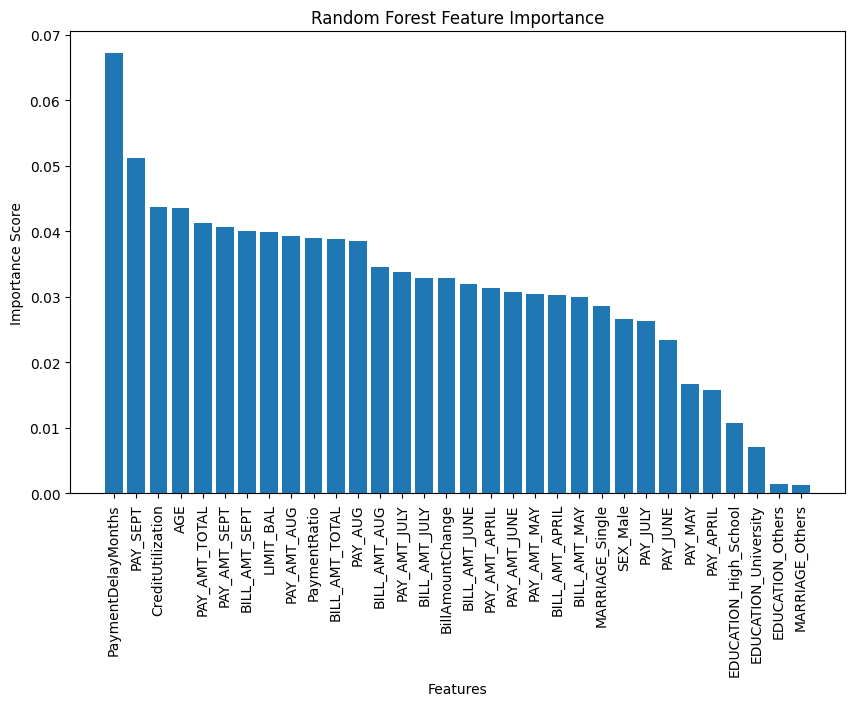

In [30]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Split the data into X_train, X_test, y_train, y_test

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance scores
feature_importance = rf_model.feature_importances_

# Create a DataFrame to display the feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Random Forest Feature Importance')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# split the data into X_train, X_test, y_train, y_test, and performed necessary feature scaling

# Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Neural Network (MLP)
mlp_model = MLPClassifier(random_state=42)
mlp_model.fit(X_train, y_train)

# Evaluate the models
models = {
    "Logistic Regression": logistic_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "SVM": svm_model,
    "Neural Network (MLP)": mlp_model
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("=" * 50)



d:\CCDP\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.7053
              precision    recall  f1-score   support

           0       0.70      0.71      0.71      4664
           1       0.71      0.71      0.71      4682

    accuracy                           0.71      9346
   macro avg       0.71      0.71      0.71      9346
weighted avg       0.71      0.71      0.71      9346

Model: Random Forest
Accuracy: 0.8420
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      4664
           1       0.86      0.82      0.84      4682

    accuracy                           0.84      9346
   macro avg       0.84      0.84      0.84      9346
weighted avg       0.84      0.84      0.84      9346

Model: XGBoost
Accuracy: 0.8200
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      4664
           1       0.84      0.79      0.82      4682

    accuracy                           0.82      9346
   macro avg  

## Recursive Feature Elimination (RFE):
RFE is a feature selection technique that recursively removes the least important features from the model until the desired number of features is reached. It uses the model's coefficient values or feature importance scores to determine the importance of each feature.

In [24]:
from sklearn.feature_selection import RFE
# Create the RFE model and select the number of top features you want to keep
num_features_to_keep = 10
rfe_model = RFE(estimator=rf_model, n_features_to_select=num_features_to_keep)
rfe_model.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe_model.support_]

# Train the model using only the selected features
rf_model.fit(X_train[selected_features], y_train)

# Evaluate the model on the test set
y_pred = rf_model.predict(X_test[selected_features])
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.8205649475711534
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      4664
           1       0.84      0.80      0.82      4682

    accuracy                           0.82      9346
   macro avg       0.82      0.82      0.82      9346
weighted avg       0.82      0.82      0.82      9346



## Hyperparameter Tuning for XGBoost:

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC


# modelling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [32]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Define the hyperparameter grids for each model
param_grid_logistic = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (50, 50), (30, 30, 30)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# Create the models with default hyperparameters
logistic_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
svm_model = SVC(random_state=42)
mlp_model = MLPClassifier(random_state=42)

# Perform Grid Search with cross-validation to find the best hyperparameters for each model
grid_search_logistic = GridSearchCV(logistic_model, param_grid_logistic, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_mlp = GridSearchCV(mlp_model, param_grid_mlp, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the models with Grid Search
grid_search_logistic.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)
grid_search_xgb.fit(X_train, y_train)
grid_search_svm.fit(X_train, y_train)
grid_search_mlp.fit(X_train, y_train)

# Get the best hyperparameters and best models
best_params_logistic = grid_search_logistic.best_params_
best_logistic_model = grid_search_logistic.best_estimator_

best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_

best_params_xgb = grid_search_xgb.best_params_
best_xgb_model = grid_search_xgb.best_estimator_

best_params_svm = grid_search_svm.best_params_
best_svm_model = grid_search_svm.best_estimator_

best_params_mlp = grid_search_mlp.best_params_
best_mlp_model = grid_search_mlp.best_estimator_

# Evaluate the best models
best_models = {
    "Logistic Regression": best_logistic_model,
    "Random Forest": best_rf_model,
    "XGBoost": best_xgb_model,
    "SVM": best_svm_model,
    "Neural Network (MLP)": best_mlp_model
}

# Calculate accuracies
model_accuracies = {}
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values())
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy with Hyperparameter Tuning')
plt.ylim(0.5, 1.0)  # Adjust the y-axis limits as needed
plt.xticks(rotation=45, ha='right')
plt.show()
